Лабораторна робота №5 Розв’язання систем нелінійних рівнянь
Варіант 1
Галатенко Дарія Іванівна 2-16
Завдання: Розв’язати систему нелінійних рівнянь з точністю до 0.001. Відокремлення коренів виконати графічно. Уточнення коренів провести методом простої ітерації.
№1.   (sin⁡(x+1)-y=1.
       @2x+cos⁡(y)=┤Перепишемо дану систему у вигляді:
y=sin(x+1)-1.2
x=1-1/2cos(y)
Відокремлення коренів проводимо графічно:


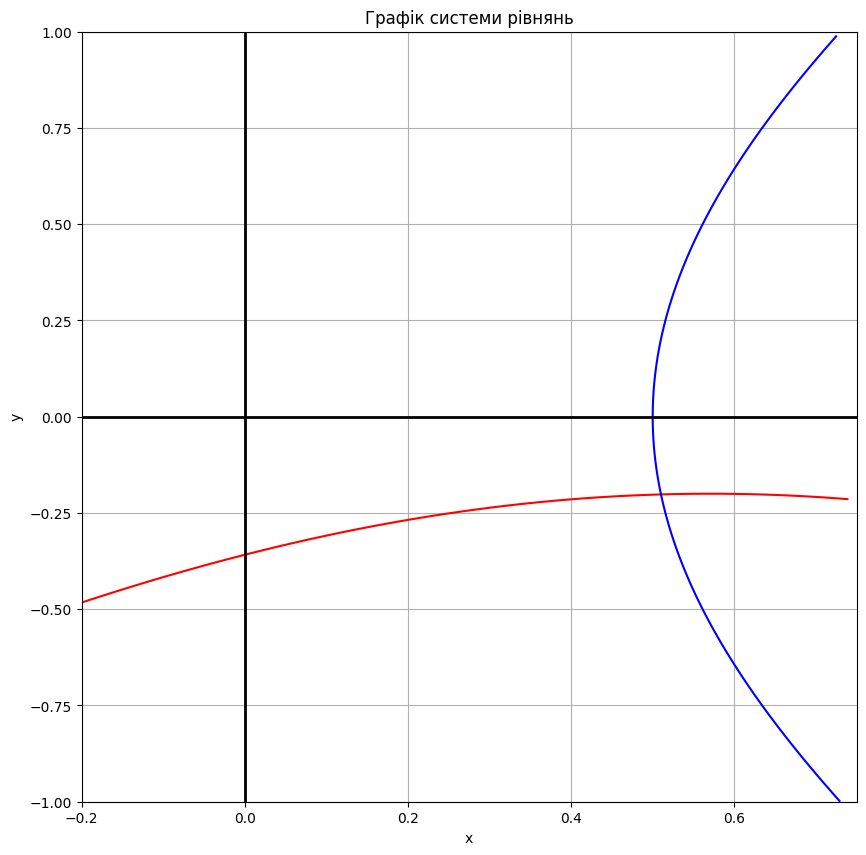

In [10]:
import numpy as np
import matplotlib.pyplot as plt
# область значень для x та y
x_min, x_max = -0.2, 0.75
y_min, y_max = -1, 1
step = 0.01

# створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step),
                   np.arange(y_min, y_max, step))

# рівняння системи
eq1 = np.sin(x + 1) - y - 1.2
eq2 = 2*x + np.cos(y) - 2

# створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# додаємо вісі x та y
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)
# налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')
plt.grid(True)

# показуємо графік
plt.show()

З графіку бачимо, що система має єдиний розв’язок, що лежить в області D зміни значень невідомих:
0.4<x<0.6
0<y<-0.25
Упевнимося, що метод простої ітерації є збіжним для уточнення розв’язку даної системи. Для цього запишемо її у наступному вигляді: 
x=f1(x,y)=1-1/2*cos(y)
y=f2(x,y)=sin(x+1)-1.2
Оскільки
df1/dx=0
df2/dx=cos(x+1)
df1/dy=1/2*sin(y)
df2/dy=0
то в області D маємо:
|∂f1/∂x|+|∂f2/∂x|=|cos(x+1)|<=cos(0.6)≈0.8253<1
|∂f1/∂y|+|∂f2/∂y|=1/2*-sin(y)|<1/2*-sin-0.252|≈012372<
Таким чином умови збіжності виконуються.
Початкові наближення:x = 0.5
y = -0.1 
0
​
 =−0.1. 1

In [42]:
import numpy as np
from scipy import optimize

# Функції, які використовуємо для ітераційного методу
def g(x, y):
    return 1 - np.cos(y) / 2

def h(x, y):
    return np.sin(x + 1) - 1.2

# Початкові наближення
x_approx = 0.5
y_approx = -0.1

# Точність
tolerance = 0.001

# Ітераційний процес
while True:
    x_new = g(x_approx, y_approx)
    y_new = h(x_new, y_approx)
    if abs(x_new - x_approx) < tolerance and abs(y_new - y_approx) < tolerance:
        break
    x_approx = x_new
    y_approx = y_new

print("Результати методу простої ітерації:")
print("x =", round(x_approx,3))
print("y =", round(y_approx,3))

# Перевірка
def f3(z):
    x, y = z
    return [np.sin(x + 1) - y - 1.2, 2*x + np.cos(y) - 2]

solution = optimize.root(f3, [0.5, -0.1], method='hybr')
print("\nПеревірка:")
print("x =", round(solution.x[0],3))
print("y =", round(solution.x[1],3))

Результати методу простої ітерації:
x = 0.51
y = -0.202

Перевірка:
x = 0.51
y = -0.202


Висновок: Використання методу простої ітерації дозволило мені здійснити ітераційний процес для знаходження наближених значень коренів системи з встановленою точністю. Порівняння результатів з використанням бібліотеки SciPy підтвердило правильність моїх розрахунків та дало додаткову перевірку точності.

Ця лабораторна робота допомогла мені розвинути навички програмування на мові Python, а також поглибити знання про роботу з чисельними методами та бібліотеками для наукових обчислень. Як студент, ці знання будуть корисні для подальших досліджень і виконання аналітичних завдань